In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv
from scipy.stats import chi2 

loans = pd.read_csv(r'D:\New folder\Loan_Default.csv', delimiter=',')
print(loans.head())
print("Total enteries : ",loans.shape[0])
print("Total attributes : ",loans.shape[1])
print(loans.info())



def plot_custom_boxplot(data, column, figsize=(10, 6), color='lightblue', median_line_color='red', title='Box Plot', xlabel='X-axis', ylabel='Y-axis', log_transform=False):
  
    plt.figure(figsize=figsize)

    data_copy = data.copy()

    if log_transform:
        data_copy[column] = np.log1p(data_copy[column]) 

    sns.boxplot(data=data_copy, x=column, color=color, medianprops=dict(color=median_line_color))

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

    
def plot_boxplot_bivariate(data,  numerical_col, categorical_col = 'Status_str', title="Box Plot"):
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=categorical_col, y=numerical_col, data=data)
    plt.title(title)
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.show()

    
def calculate_threshold(df, alpha=0.05):
   
    p = df.shape[1]

    threshold = chi2.ppf(1 - alpha, df=p)

    return threshold

    
def plot_count_distribution(data, column, title, xlabel, ylabel, figsize=(6, 4), palette="pastel", log_scale = False):
   
    sns.set(style="whitegrid")
    
    plt.figure(figsize=figsize)
    sns.countplot(x=data[column], palette=palette, edgecolor="black")
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    if log_scale:
        plt.yscale('log')
    plt.show()

    
def plot_grouped_bar_chart(data, x_column, title, xlabel, ylabel, hue_column='Status_str', figsize=(6, 4), palette="pastel", log_scale=False, bar_width=0.8):
  
    sns.set(style="whitegrid")
    
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=x_column, hue=hue_column, multiple="dodge", palette=palette, shrink=bar_width)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    if log_scale:
        plt.yscale('log')
    
    plt.show()
def plot_numeric_distribution(data, column, title, xlabel, ylabel, bins=10, figsize=(6, 4), color="skyblue"):
    
    sns.set(style="whitegrid")
    
    plt.figure(figsize=figsize)
    plt.hist(data[column], bins=bins, color=color, edgecolor="black")
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    plt.show()

    
def get_outliers(df, column, lower_quantile=0.25, upper_quantile=0.75, iqr_multiplier=1.5):
   

    percentile_lower = np.quantile(df[column], lower_quantile)
    percentile_upper = np.quantile(df[column], upper_quantile)

    IQR = percentile_upper - percentile_lower

    lower_bound = percentile_lower - (iqr_multiplier * IQR)
    upper_bound = percentile_upper + (iqr_multiplier * IQR)

    return (df[column] < lower_bound) | (df[column] > upper_bound)




    
    

      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

In [16]:
loans.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [17]:
loans.describe(include = ['object', 'category'])

loan_limit  Gender approv_in_adv loan_type loan_purpose  \
count      145326  148670        147762    148670       148536   
unique          2       4             2         3            4   
top            cf    Male         nopre     type1           p3   
freq       135348   42346        124621    113173        55934   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
count             148670      148670                 148670            148549   
unique                 2           2                      2                 2   
top                   l1        nopc                  nob/c           not_neg   
freq              142344      148114                 127908            133420   

       interest_only  ... construction_type occupancy_type Secured_by  \
count         148670  ...            148670         148670     148670   
unique             2  ...                 2              3          2   
top          not_int  ...                sb             pr       home   
freq          141560  ...            148637         138201     148637   

       total_units credit_type co-applicant_credit_type     age  \
count       148670      148670                   148670  148470   
unique           4           4                        2       7   
top             1U         CIB                      CIB   45-54   
freq        146480       48152                    74392   34720   

       submission_of_application  Region Security_Type  
count                     148470  148670        148670  
unique                         2       4             2  
top                      to_inst   North        direct  
freq                       95814   74722        148637  

[4 rows x 21 columns]

In [18]:
loans.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [10]:
#Data cleaning
loans.drop(columns = ['ID', 'year', 'loan_limit', 'loan_type', 'loan_purpose',
                      'Credit_Worthiness', 'construction_type', 'credit_type', 
                      'co-applicant_credit_type', 'submission_of_application', 
                      'dtir1'], axis = 1, inplace = True)
loans.head(3)


Gender approv_in_adv open_credit business_or_commercial  \
0  Sex Not Available         nopre        nopc                  nob/c   
1               Male         nopre        nopc                    b/c   
2               Male           pre        nopc                  nob/c   

   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500               NaN                   NaN              NaN   
1       206500               NaN                   NaN              NaN   
2       406500              4.56                   0.2            595.0   

    term Neg_ammortization  ... occupancy_type Secured_by  total_units  \
0  360.0           not_neg  ...             pr       home           1U   
1  360.0           not_neg  ...             pr       home           1U   
2  360.0           neg_amm  ...             pr       home           1U   

   income Credit_Score    age        LTV  Region Security_Type  Status  
0  1740.0          758  25-34  98.728814   south        direct       1  
1  4980.0          552  55-64        NaN   North        direct       1  
2  9480.0          834  35-44  80.019685   south        direct       0  

[3 rows x 23 columns]

In [15]:
len(loans[loans.duplicated()])
loans.drop_duplicates(inplace = True)
loans.isna().sum()

Gender                        0
approv_in_adv                 0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36150
Interest_rate_spread      36150
Upfront_charges           39283
term                          0
Neg_ammortization             0
interest_only                 0
lump_sum_payment              0
property_value            14980
occupancy_type                0
Secured_by                    0
total_units                   0
income                     8918
Credit_Score                  0
age                           0
LTV                       14980
Region                        0
Security_Type                 0
Status                        0
dtype: int64

In [18]:

loans.dropna(subset=['approv_in_adv', 'term', 'Neg_ammortization', 'age'], inplace=True)
loans[['rate_of_interest', 'Interest_rate_spread']].describe()

rate_of_interest  Interest_rate_spread
count     111249.000000         111249.000000
mean           4.043794              0.441357
std            0.561096              0.513144
min            0.000000             -3.638000
25%            3.625000              0.075800
50%            3.990000              0.390100
75%            4.375000              0.775200
max            8.000000              3.357000

In [20]:
loans = loans.assign(
    rate_of_interest=loans['rate_of_interest'].fillna(loans['rate_of_interest'].mean()),
    Interest_rate_spread=loans['Interest_rate_spread'].fillna(loans['Interest_rate_spread'].mean())
)


In [21]:
loans['Upfront_charges'].describe()

count    108116.000000
mean       3227.258245
std        3253.012089
min           0.000000
25%         583.000000
50%        2598.735000
75%        4815.792500
max       60000.000000
Name: Upfront_charges, dtype: float64

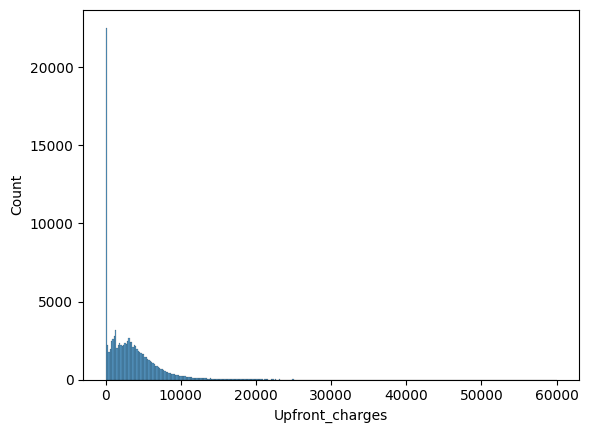

In [22]:
sns.histplot(loans['Upfront_charges'])
plt.show()

In [23]:
loans['Upfront_charges'].fillna(loans['Upfront_charges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\855404329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loans['Upfront_charges'].fillna(loans['Upfront_charges'].median(), inplace=True)


count    1.473990e+05
mean     4.902633e+05
std      3.419902e+05
min      8.000000e+03
25%      2.880000e+05
50%      4.180000e+05
75%      5.980000e+05
max      1.650800e+07
Name: property_value, dtype: float64


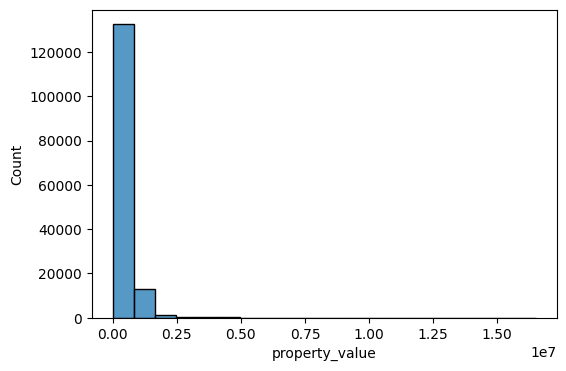

In [30]:
print(loans['property_value'].describe())
plt.figure(figsize=(6,4))
sns.histplot(loans['property_value'], bins = 20)
plt.show()


In [26]:
loans['property_value'].fillna(loans['property_value'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\718237077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loans['property_value'].fillna(loans['property_value'].median(), inplace=True)


count    138481.000000
mean       6957.746983
std        6500.235892
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64


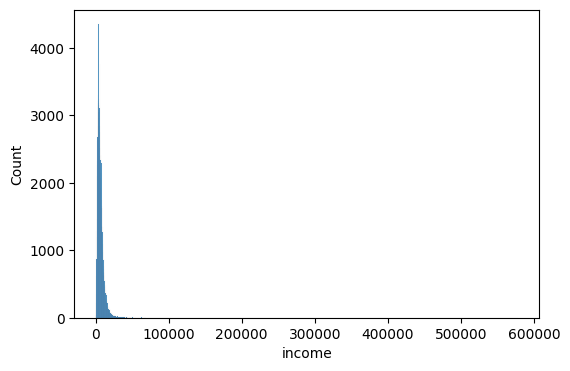

In [29]:
print(loans['income'].describe())
plt.figure(figsize=(6,4))
sns.histplot(loans['income'])
plt.show()

In [31]:
print(loans.groupby('age')['income'].describe())
median_income_by_age = loans.groupby('age')['income'].median()
loans['income'] = loans['income'].fillna(loans['age'].map(median_income_by_age))


         count         mean          std  min     25%     50%     75%  \
age                                                                     
25-34  17750.0  6559.892958  4957.931211  0.0  3960.0  5760.0  8040.0   
35-44  30519.0  7704.667256  5492.688549  0.0  4620.0  6720.0  9360.0   
45-54  32422.0  7975.865770  8275.107227  0.0  4320.0  6540.0  9600.0   
55-64  30681.0  6901.777647  6666.542930  0.0  3600.0  5520.0  8400.0   
65-74  19240.0  5405.706861  5421.487991  0.0  2880.0  4260.0  6420.0   
<25     1268.0  4968.738170  7537.442071  0.0  2505.0  3600.0  5595.0   
>74     6601.0  4739.554613  4535.072575  0.0  2520.0  3660.0  5580.0   

            max  
age              
25-34  235980.0  
35-44  189360.0  
45-54  578580.0  
55-64  377220.0  
65-74  312000.0  
<25    198060.0  
>74    136680.0  


In [32]:
loans['LTV'].fillna((loans['loan_amount']/loans['property_value'])*100, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\3195587053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loans['LTV'].fillna((loans['loan_amount']/loans['property_value'])*100, inplace = True)


In [34]:
loans.dtypes
loans[['Gender','approv_in_adv', 'open_credit', 
       'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'occupancy_type',
       'Secured_by','total_units','age','Region', 
       'Security_Type']] = loans[['Gender','approv_in_adv', 
                                  'open_credit', 'business_or_commercial',
                                  'Neg_ammortization', 'interest_only', 'lump_sum_payment', 
                                  'occupancy_type', 'Secured_by','total_units','age','Region', 
                                  'Security_Type']].astype('category')

loans['term'] = loans['term'].astype(int)


In [36]:
loans[loans['LTV'] < ((loans['loan_amount']/loans['property_value'])*100)-1][['loan_amount', 'property_value', 'LTV']]

Empty DataFrame
Columns: [loan_amount, property_value, LTV]
Index: []

In [37]:
for col in loans.columns:
    if loans[col].dtype == "category":
        print(f"Unique values in {col} column are :{loans[col].unique().to_list()}\n")

Unique values in Gender column are :['Sex Not Available', 'Male', 'Joint', 'Female']

Unique values in approv_in_adv column are :['nopre', 'pre']

Unique values in open_credit column are :['nopc', 'opc']

Unique values in business_or_commercial column are :['nob/c', 'b/c']

Unique values in Neg_ammortization column are :['not_neg', 'neg_amm']

Unique values in interest_only column are :['not_int', 'int_only']

Unique values in lump_sum_payment column are :['not_lpsm', 'lpsm']

Unique values in occupancy_type column are :['pr', 'sr', 'ir']

Unique values in Secured_by column are :['home', 'land']

Unique values in total_units column are :['1U', '2U', '3U', '4U']

Unique values in age column are :['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25']

Unique values in Region column are :['south', 'North', 'central', 'North-East']

Unique values in Security_Type column are :['direct', 'Indriect']



C:\Users\HP\AppData\Local\Temp\ipykernel_3196\2520457024.py:3: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  print(f"Unique values in {col} column are :{loans[col].unique().to_list()}\n")


In [19]:
loans['Security_Type'] = loans['Security_Type'].replace({'Indriect':'Indirect'}) 
loans['occupancy_type'] = loans['occupancy_type'].replace({'pr':'Primary Residential', 'sr':'Secondary Residdential', 'ir':'Investment Residential'}) 

In [41]:
  loans.select_dtypes(include=[np.number])

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0            116500          4.043794              0.441357         2598.735   
1            206500          4.043794              0.441357         2598.735   
2            406500          4.560000              0.200000          595.000   
3            456500          4.250000              0.681000         2598.735   
4            696500          4.000000              0.304200            0.000   
...             ...               ...                   ...              ...   
148665       436500          3.125000              0.257100         9960.000   
148666       586500          5.190000              0.854400            0.000   
148667       446500          3.125000              0.081600         1226.640   
148668       196500          3.500000              0.582400         4323.330   
148669       406500          4.375000              1.387100         6000.000   

        term  property_value   income  Credit_Score        LTV  Status  
0        360        118000.0   1740.0           758  98.728814       1  
1        360        418000.0   4980.0           552  49.401914       1  
2        360        508000.0   9480.0           834  80.019685       0  
3        360        658000.0  11880.0           587  69.376900       0  
4        360        758000.0  10440.0           602  91.886544       0  
...      ...             ...      ...           ...        ...     ...  
148665   180        608000.0   7860.0           659  71.792763       0  
148666   360        788000.0   7140.0           569  74.428934       0  
148667   180        728000.0   6900.0           702  61.332418       0  
148668   180        278000.0   7140.0           737  70.683453       0  
148669   240        558000.0   7260.0           830  72.849462       0  

[147399 rows x 10 columns]

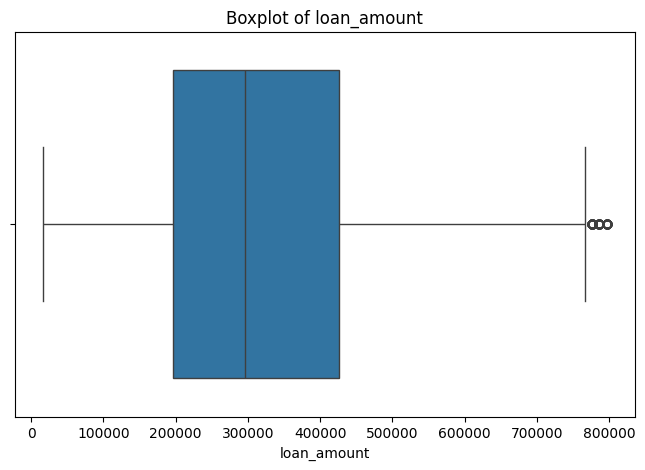

In [20]:
def plot_custom_boxplot(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

plot_custom_boxplot(loans, 'loan_amount')  

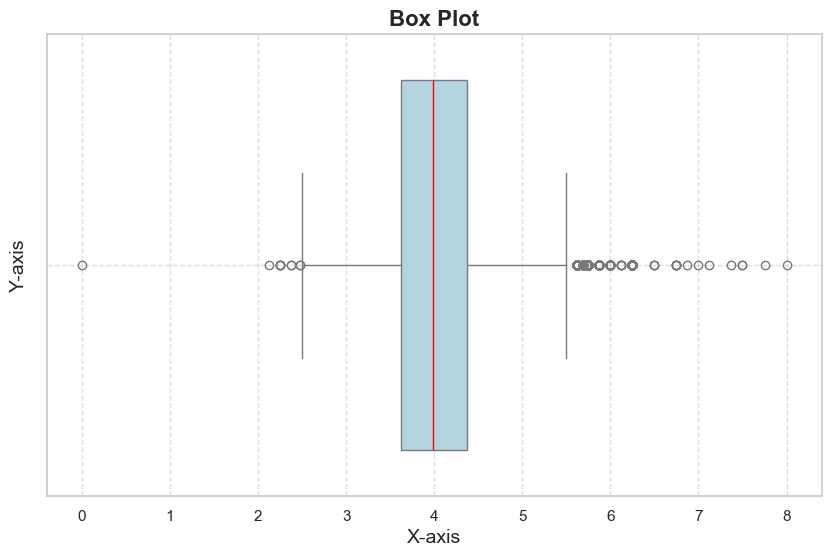

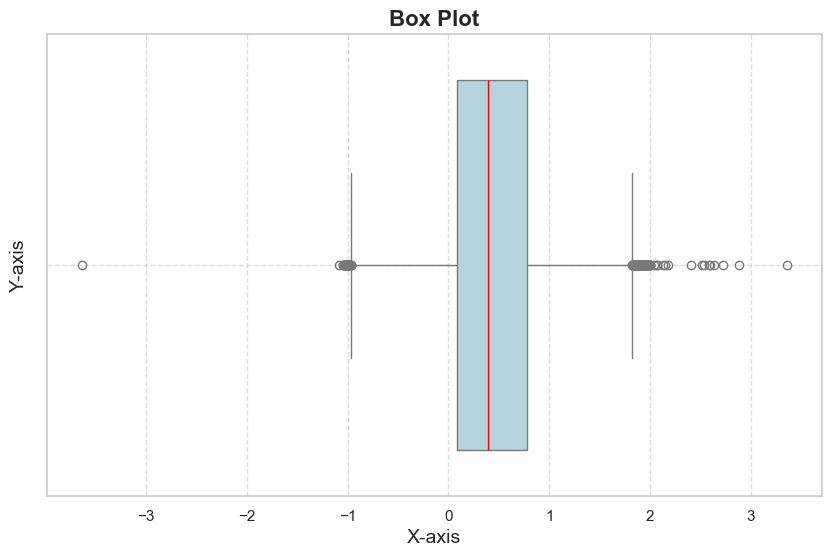

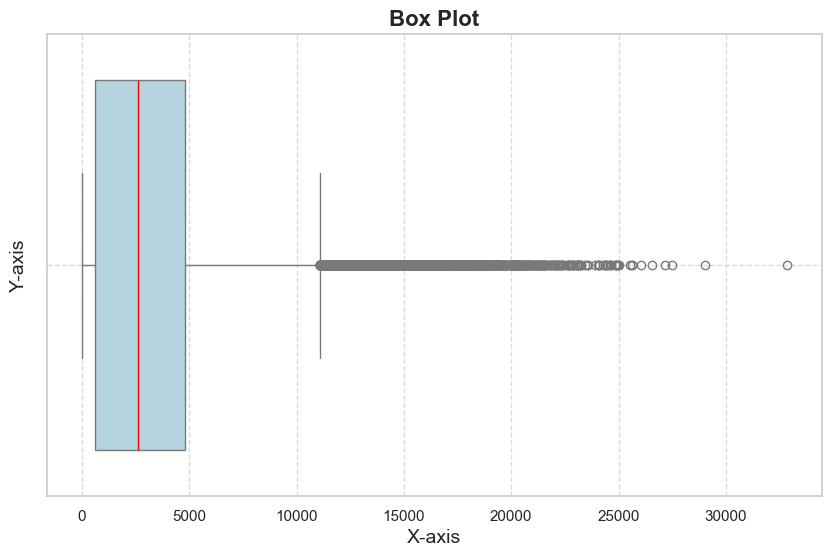

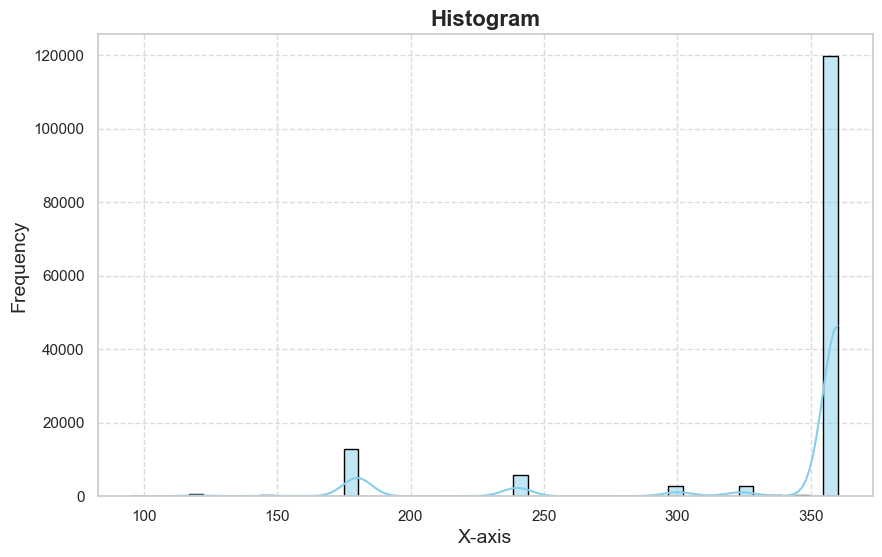

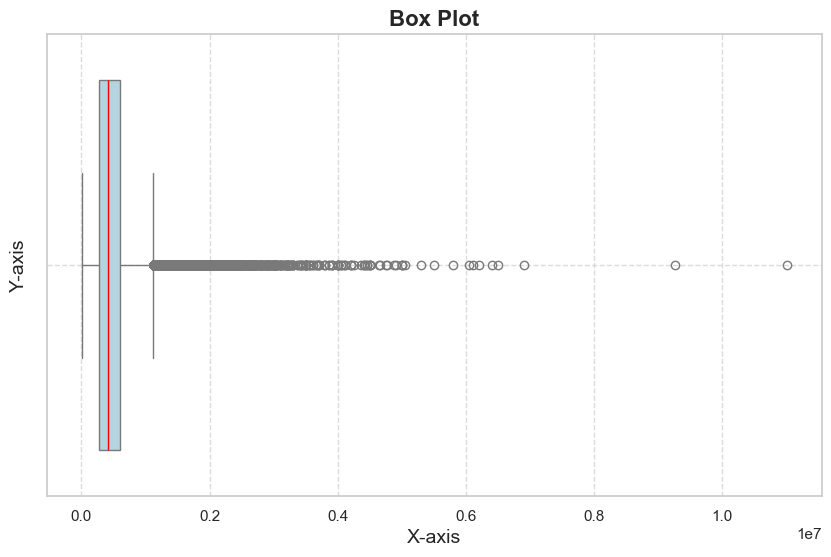

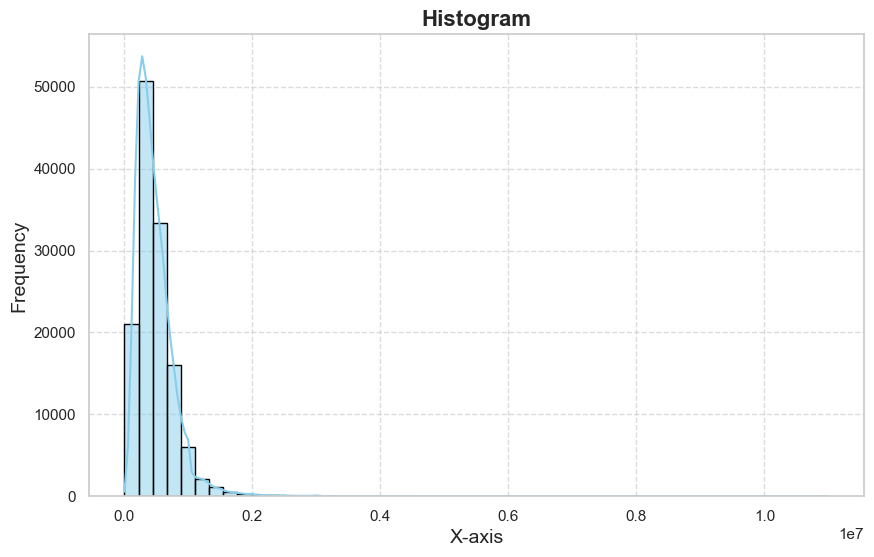

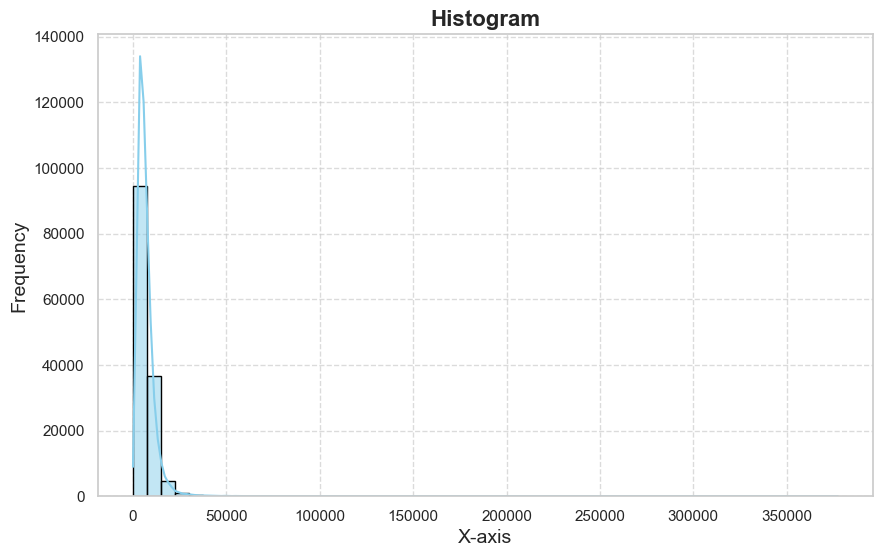

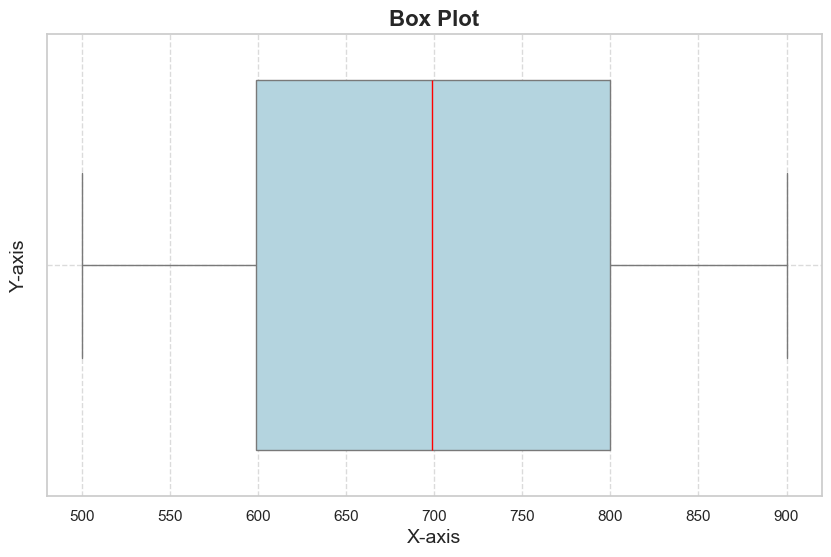

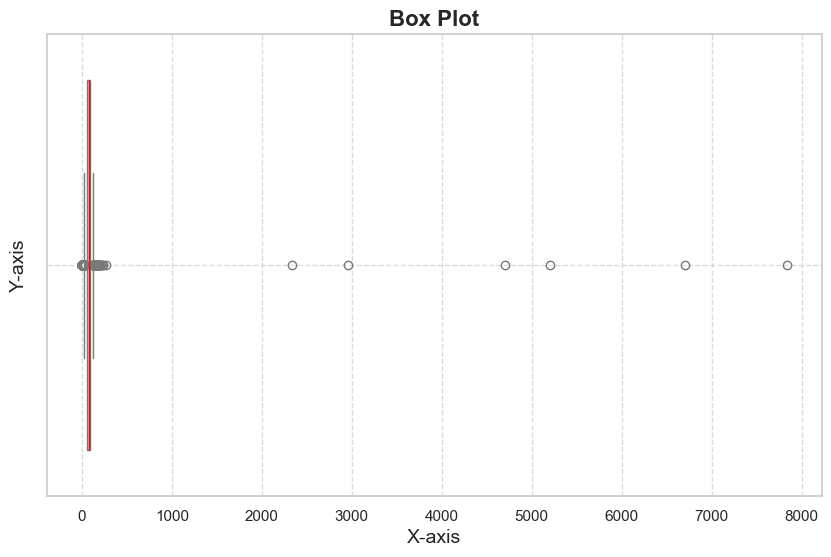

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


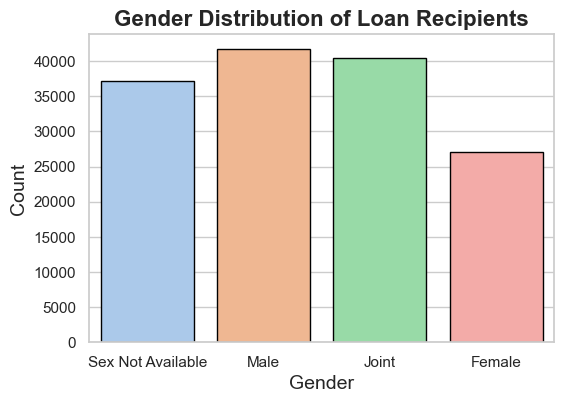

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


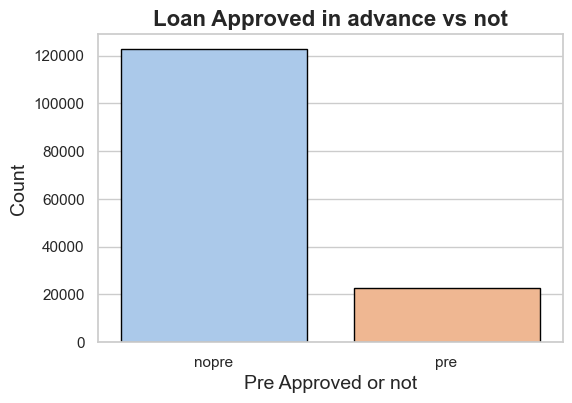

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


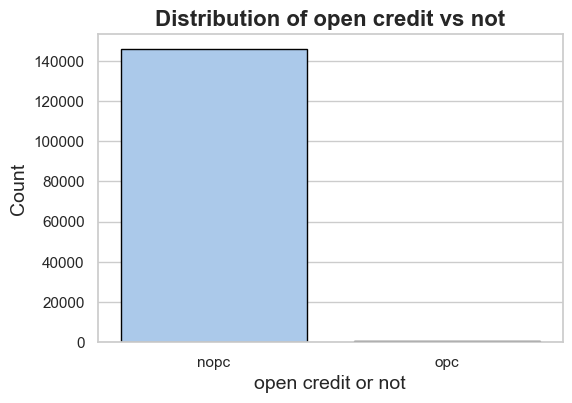

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


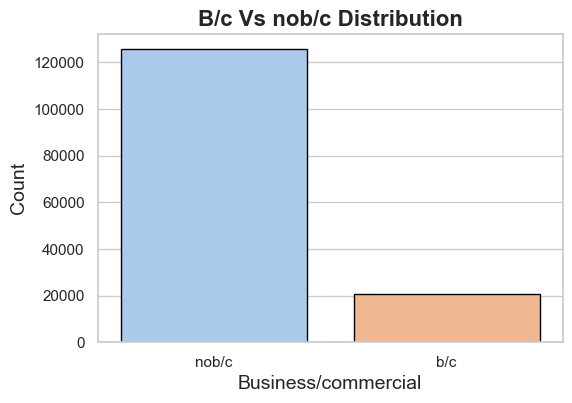

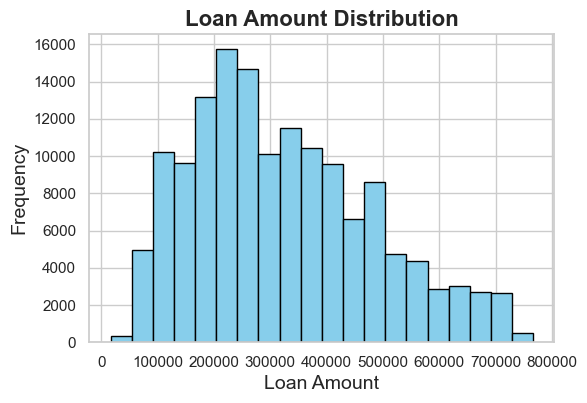

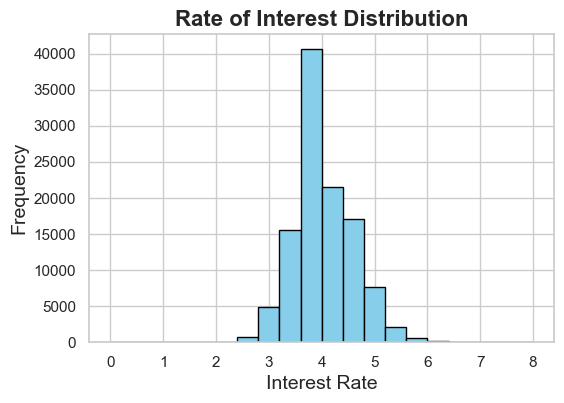

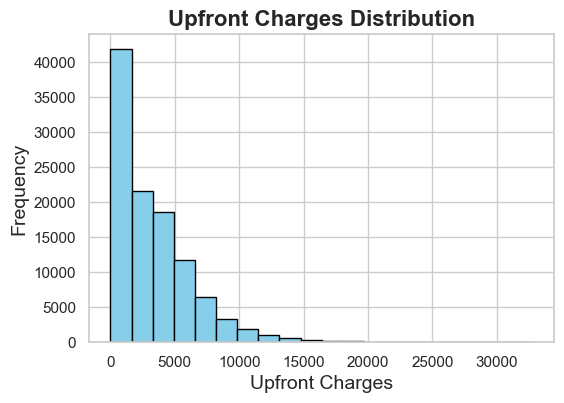

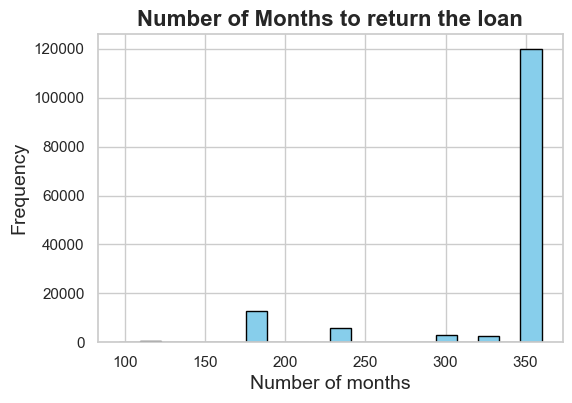

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


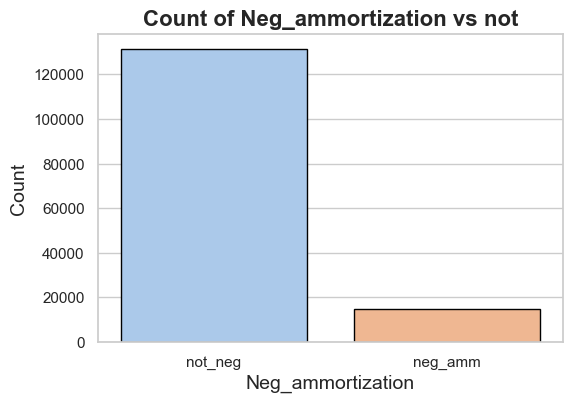

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


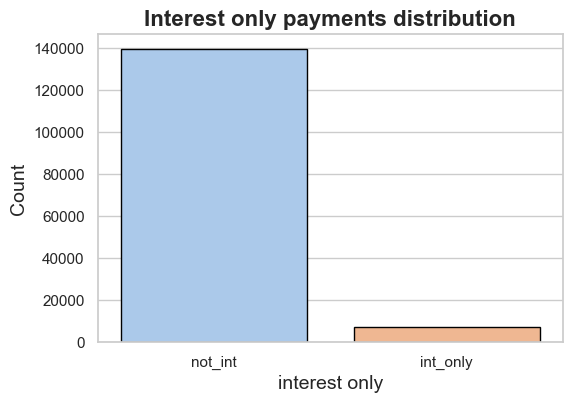

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


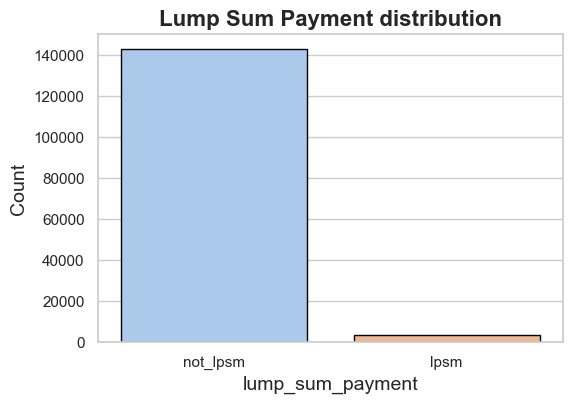

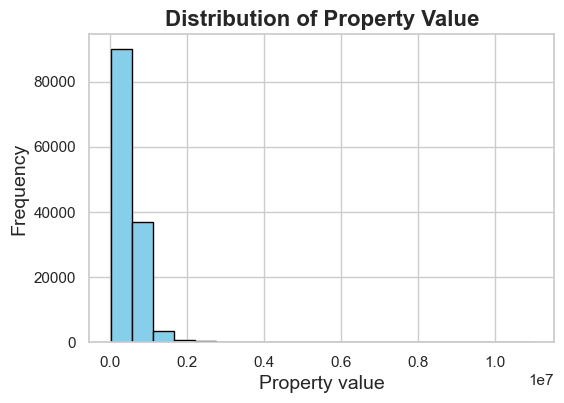

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


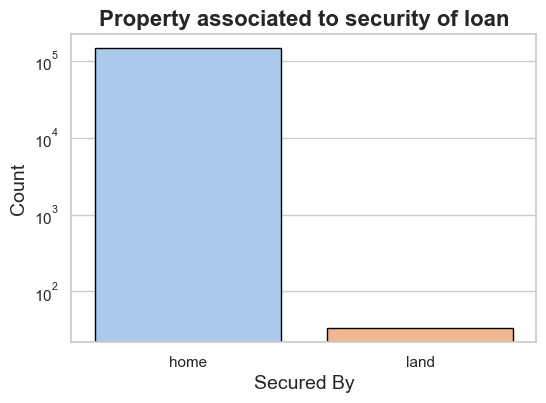

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


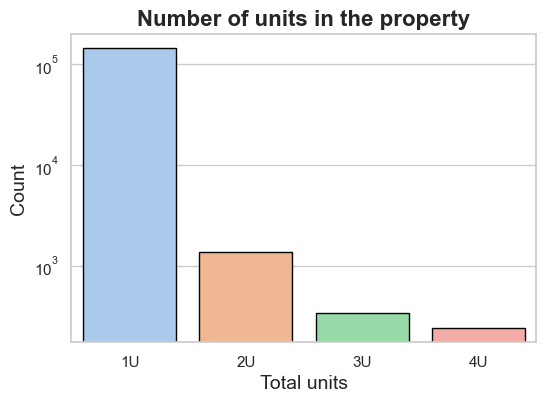

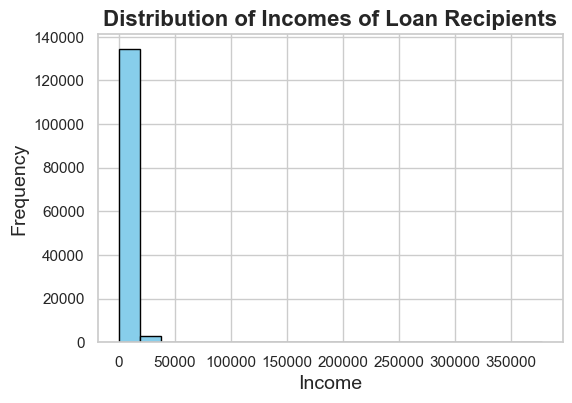

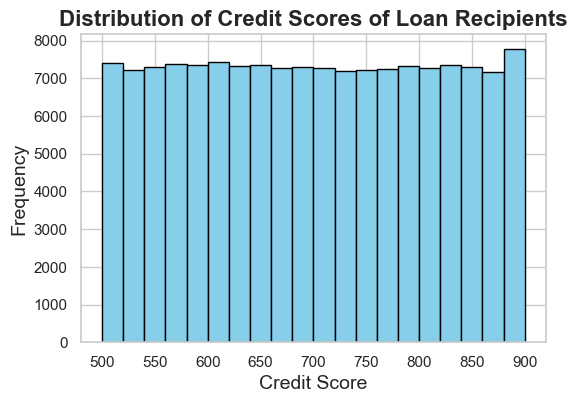

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


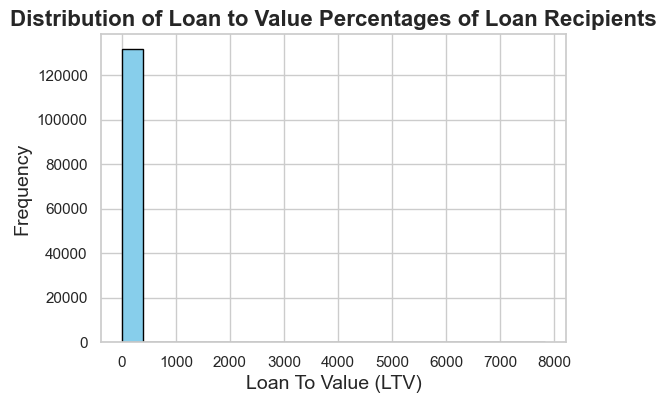

In [46]:
loan_amt_outliers = get_outliers(loans, 'loan_amount')
indices = loans[loan_amt_outliers].index
loans.drop(indices, inplace = True)

plot_custom_boxplot(loans, 'rate_of_interest')

outliers = get_outliers(loans, 'rate_of_interest')
loans.drop(loans[outliers].index, inplace = True)

plot_custom_boxplot(loans, 'Interest_rate_spread')

loans['Interest_rate_spread'].describe()

outliers = get_outliers(loans, 'Interest_rate_spread', upper_quantile = 0.80)


loans.drop(loans[outliers].index, inplace = True)
plot_custom_boxplot(loans, 'Upfront_charges')

def plot_custom_histogram(data, column, bins=50, figsize=(10, 6), kde=True, color='skyblue', edgecolor='black', title='Histogram', xlabel='X-axis', ylabel='Frequency'):

    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=kde, color=color, edgecolor=edgecolor)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()


outliers = get_outliers(loans, 'Upfront_charges', upper_quantile = 0.8)
loans.drop(loans[outliers].index, inplace = True)
plot_custom_histogram(loans, 'term')



loans['term'].describe()
outliers = get_outliers(loans, 'term', lower_quantile = 0.14)
loans.drop(loans[outliers].index, inplace = True)
plot_custom_boxplot(loans, 'property_value')



plot_custom_histogram(loans, 'property_value')
outliers = get_outliers(loans, 'property_value', upper_quantile = 0.8)
loans.drop(loans[outliers].index, inplace = True)



plot_custom_histogram(loans, 'income')
outliers = get_outliers(loans, 'income')
loans.drop(loans[outliers].index, inplace = True)
plot_custom_boxplot(loans, 'Credit_Score')

plot_custom_boxplot(loans, 'LTV')
outliers = get_outliers(loans, 'LTV')
loans.drop(loans[outliers].index, inplace = True)

#Univariate Analysis
loans['Gender'].nunique()
gender_counts = loans['Gender'].value_counts()
gender_counts
plot_count_distribution(data=loans, 
                        column='Gender', 
                        title='Gender Distribution of Loan Recipients', 
                        xlabel='Gender', 
                        ylabel='Count')



loans['approv_in_adv'].nunique()
loans['approv_in_adv'].value_counts()
plot_count_distribution(data=loans, 
                        column='approv_in_adv', 
                        title='Loan Approved in advance vs not', 
                        xlabel='Pre Approved or not', 
                        ylabel='Count')


loans['open_credit'].nunique()
loans['open_credit'].value_counts()
plot_count_distribution(data=loans, 
                        column='open_credit', 
                        title='Distribution of open credit vs not', 
                        xlabel='open credit or not', 
                        ylabel='Count')


loans['business_or_commercial'].nunique()
loans['business_or_commercial'].value_counts()
plot_count_distribution(data=loans, 
                        column='business_or_commercial', 
                        title='B/c Vs nob/c Distribution', 
                        xlabel='Business/commercial', 
                        ylabel='Count')


loans['loan_amount'].describe()
plot_numeric_distribution(data=loans, 
                          column='loan_amount', 
                          title='Loan Amount Distribution', 
                          xlabel='Loan Amount', 
                          ylabel='Frequency', 
                          bins=20)


loans['rate_of_interest'].describe()
plot_numeric_distribution(data=loans, 
                          column='rate_of_interest', 
                          title='Rate of Interest Distribution', 
                          xlabel='Interest Rate', 
                          ylabel='Frequency', 
                          bins=20)


loans['Upfront_charges'].describe()
plot_numeric_distribution(data=loans, 
                          column='Upfront_charges', 
                          title='Upfront Charges Distribution', 
                          xlabel='Upfront Charges', 
                          ylabel='Frequency', 
                          bins=20)



loans['term'].describe()
plot_numeric_distribution(data=loans, 
                          column='term', 
                          title='Number of Months to return the loan', 
                          xlabel='Number of months', 
                          ylabel='Frequency', 
                          bins=20)



loans.columns
loans['Neg_ammortization'].nunique()
loans['Neg_ammortization'].value_counts()
plot_count_distribution(data=loans, 
                        column='Neg_ammortization', 
                        title='Count of Neg_ammortization vs not', 
                        xlabel='Neg_ammortization', 
                        ylabel='Count')



loans['interest_only'].nunique()
loans['interest_only'].value_counts()
plot_count_distribution(data=loans, 
                        column='interest_only', 
                        title='Interest only payments distribution', 
                        xlabel='interest only', 
                        ylabel='Count')



loans['lump_sum_payment'].nunique()
loans['lump_sum_payment'].value_counts()
plot_count_distribution(data=loans, 
                        column='lump_sum_payment', 
                        title='Lump Sum Payment distribution', 
                        xlabel='lump_sum_payment', 
                        ylabel='Count')



loans['property_value'].describe()
plot_numeric_distribution(data=loans, 
                          column='property_value', 
                          title='Distribution of Property Value', 
                          xlabel='Property value', 
                          ylabel='Frequency', 
                          bins=20)


loans['occupancy_type'].nunique()
loans['occupancy_type'].value_counts()
plot_count_distribution(data=loans, 
                        column='occupancy_type', 
                        title='Occupancy types of Loan Recipients', 
                        xlabel='Occupancy Type', 
                        ylabel='Count')




loans['Secured_by'].nunique()
loans['Secured_by'].value_counts()
plot_count_distribution(data=loans, 
                        column='Secured_by', 
                        title='Property associated to security of loan', 
                        xlabel='Secured By', 
                        ylabel='Count',
                        log_scale = True)





loans['total_units'].nunique()
loans['total_units'].value_counts()
plot_count_distribution(data=loans, 
                        column='total_units', 
                        title='Number of units in the property', 
                        xlabel='Total units', 
                        ylabel='Count',
                       log_scale = True)


loans['income'].describe()
plot_numeric_distribution(data=loans, 
                          column='income', 
                          title='Distribution of Incomes of Loan Recipients', 
                          xlabel='Income', 
                          ylabel='Frequency', 
                          bins=20)



loans['Credit_Score'].describe()
plot_numeric_distribution(data=loans, 
                          column='Credit_Score', 
                          title='Distribution of Credit Scores of Loan Recipients', 
                          xlabel='Credit Score', 
                          ylabel='Frequency', 
                          bins=20)



loans['age'].nunique()
loans['age'].value_counts()
plot_count_distribution(data=loans, 
                        column='age', 
                        title='Distribution of Age groups of loan Recipients', 
                        xlabel='Age Group', 
                        ylabel='Count'
                       )



loans['LTV'].describe()
plot_numeric_distribution(data=loans, 
                          column='LTV', 
                          title='Distribution of Loan to Value Percentages of Loan Recipients', 
                          xlabel='Loan To Value (LTV)', 
                          ylabel='Frequency', 
                          bins=20)



C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


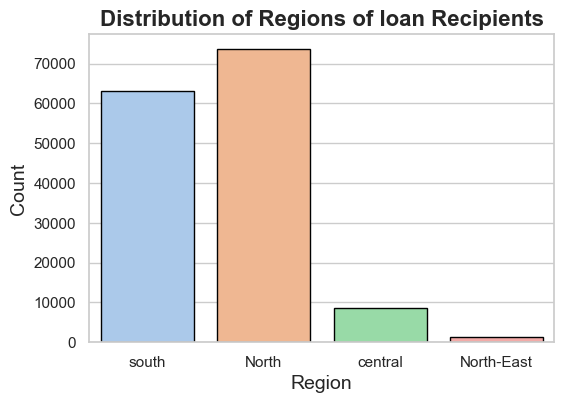

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


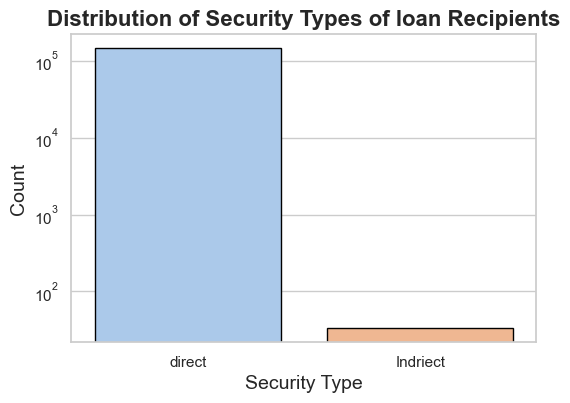

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\2423048404.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


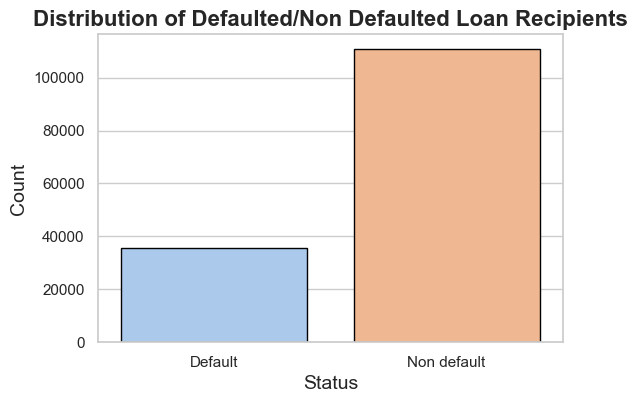

In [47]:
loans['Region'].nunique()
loans['Region'].value_counts()
plot_count_distribution(data=loans, 
                        column='Region', 
                        title='Distribution of Regions of loan Recipients', 
                        xlabel='Region', 
                        ylabel='Count'
                       )



loans['Security_Type'].nunique()
loans['Security_Type'].value_counts()
plot_count_distribution(data=loans, 
                        column='Security_Type', 
                        title='Distribution of Security Types of loan Recipients', 
                        xlabel='Security Type', 
                        ylabel='Count'
                       , log_scale = True)


loans['Status'].nunique()
loans['Status'].value_counts()
loans['Status_str'] = loans['Status'].replace({0:'Non default', 1:'Default'})
plot_count_distribution(data=loans, 
                        column='Status_str', 
                        title='Distribution of Defaulted/Non Defaulted Loan Recipients', 
                        xlabel='Status', 
                        ylabel='Count'
                       )




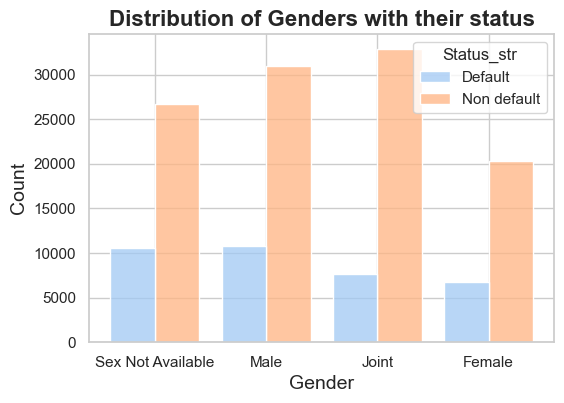

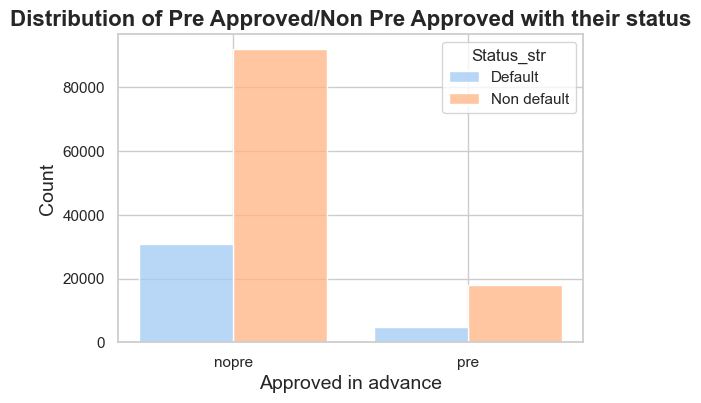

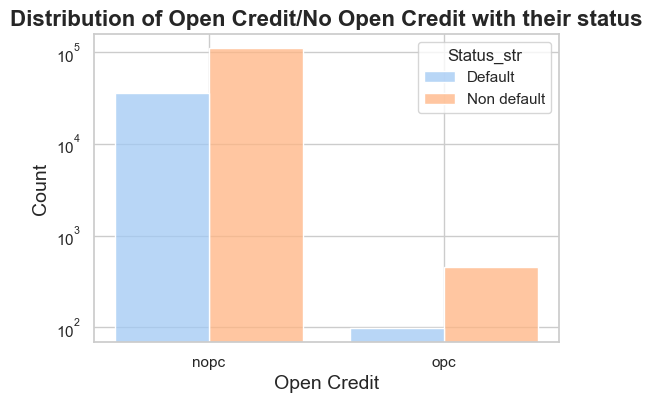

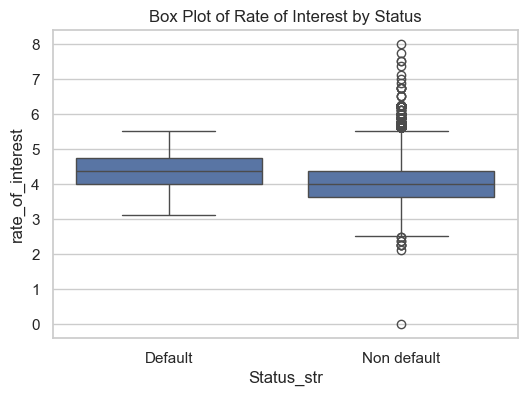

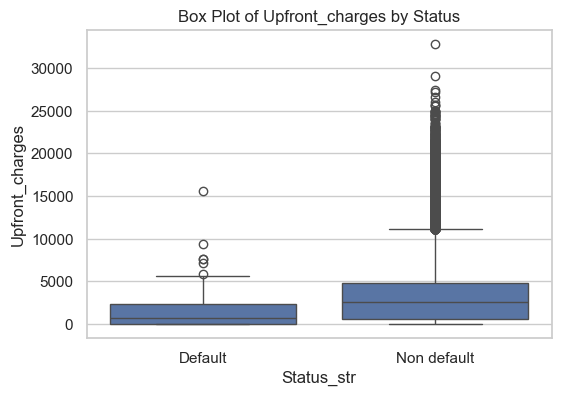

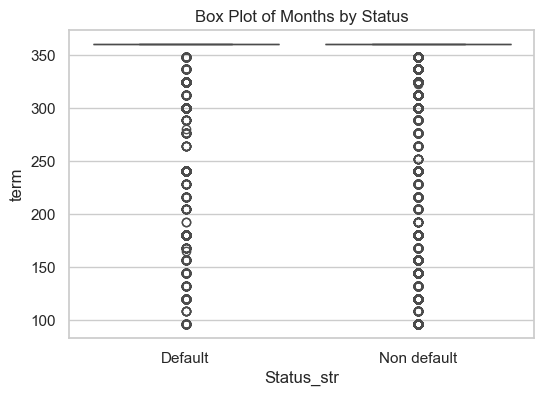

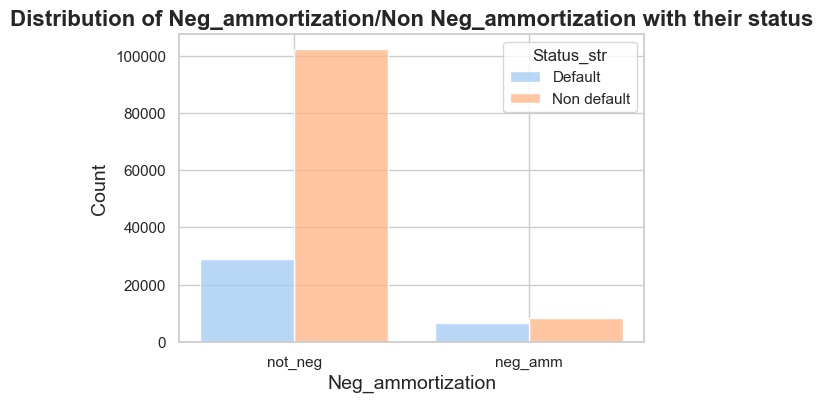

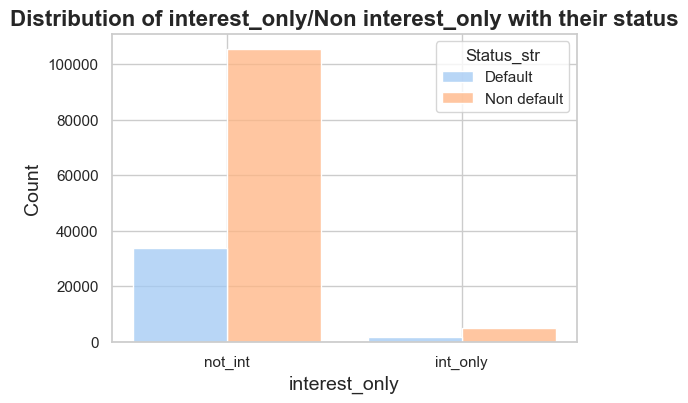

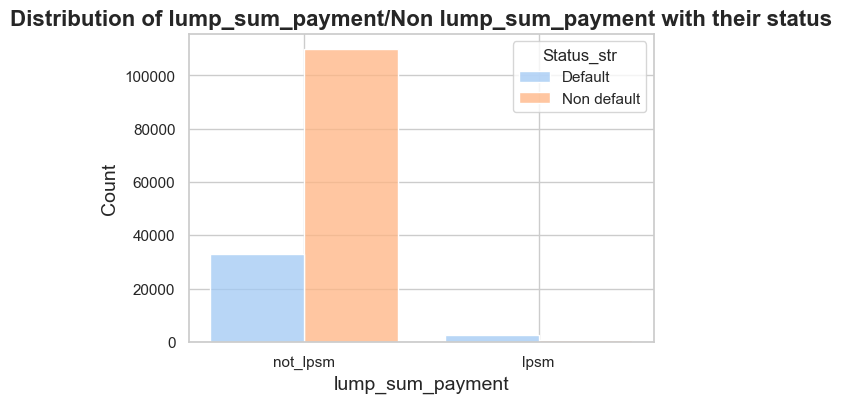

In [50]:
#Bivariate Analysis

cross_tab = pd.crosstab(loans['Gender'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='Gender',  
    title='Distribution of Genders with their status', 
    xlabel='Gender', 
    ylabel='Count'
)



cross_tab = pd.crosstab(loans['approv_in_adv'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab

plot_grouped_bar_chart(
    data=loans, 
    x_column='approv_in_adv',  
    title='Distribution of Pre Approved/Non Pre Approved with their status', 
    xlabel='Approved in advance', 
    ylabel='Count'
)



cross_tab = pd.crosstab(loans['open_credit'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='open_credit',  
    title='Distribution of Open Credit/No Open Credit with their status', 
    xlabel='Open Credit', 
    ylabel='Count',
    log_scale = True
)



cross_tab = pd.crosstab(loans['business_or_commercial'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='business_or_commercial',  
    title='Distribution of business_or_commercial/Non business_or_commercial with their status', 
    xlabel='business_or_commercial', 
    ylabel='Count'
)



loans.groupby('Status_str')['loan_amount'].describe()
plot_boxplot_bivariate(loans, 'loan_amount', title="Box Plot of loan_amount by Status")

loans.groupby('Status_str')['rate_of_interest'].describe()
plot_boxplot_bivariate(loans, 'rate_of_interest', title="Box Plot of Rate of Interest by Status")

loans.groupby('Status_str')['Upfront_charges'].describe()
plot_boxplot_bivariate(loans, 'Upfront_charges', title="Box Plot of Upfront_charges by Status")

loans.groupby('Status_str')['term'].describe()
plot_boxplot_bivariate(loans, 'term', title="Box Plot of Months by Status")



cross_tab = pd.crosstab(loans['Neg_ammortization'], loans['Status_str'])
# Calculate the percentage of Defaulted ones
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='Neg_ammortization',  
    title='Distribution of Neg_ammortization/Non Neg_ammortization with their status', 
    xlabel='Neg_ammortization', 
    ylabel='Count'
)



cross_tab = pd.crosstab(loans['interest_only'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='interest_only',  
    title='Distribution of interest_only/Non interest_only with their status', 
    xlabel='interest_only', 
    ylabel='Count'
)


cross_tab = pd.crosstab(loans['lump_sum_payment'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='lump_sum_payment',  
    title='Distribution of lump_sum_payment/Non lump_sum_payment with their status', 
    xlabel='lump_sum_payment', 
    ylabel='Count'
)





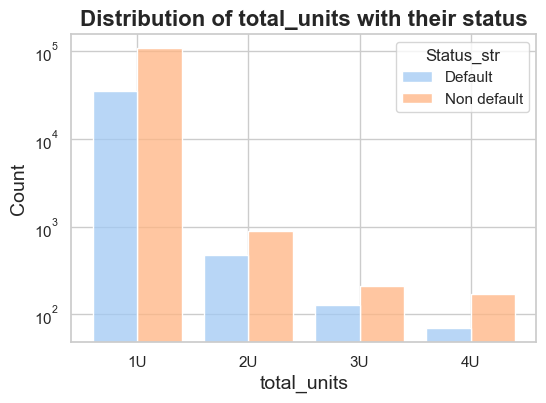

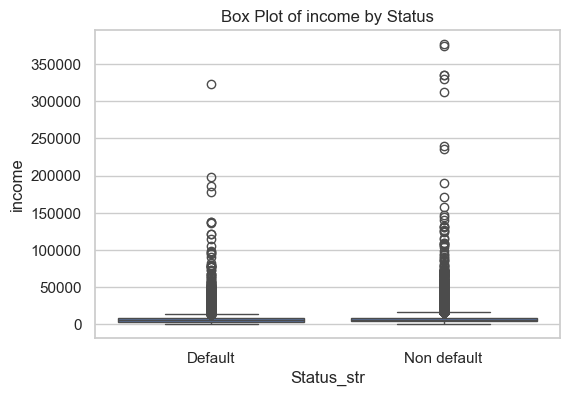

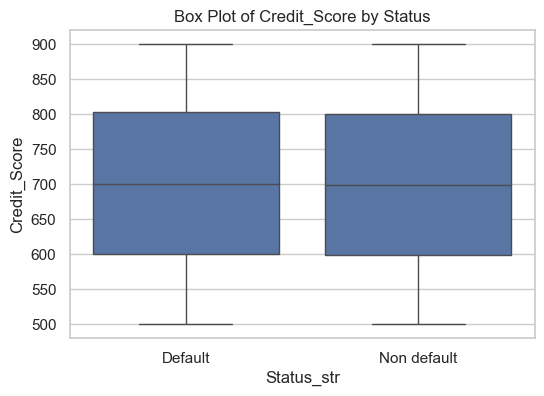

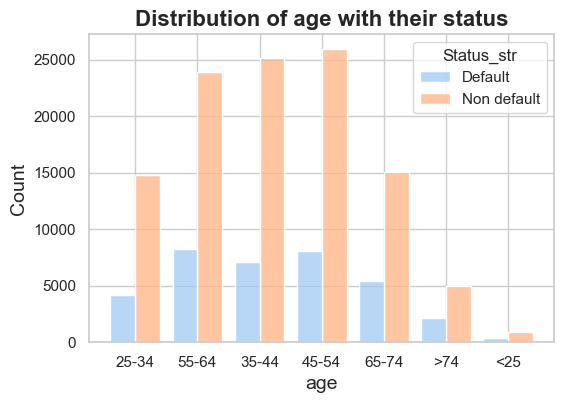

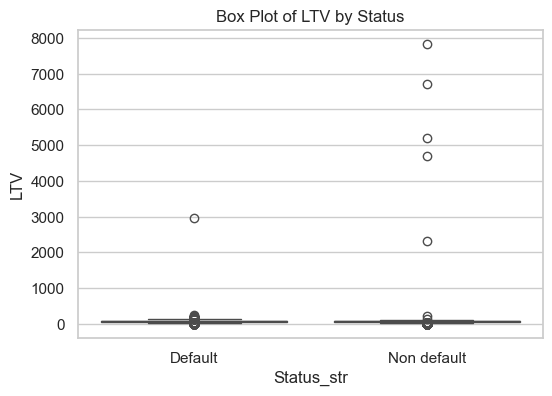

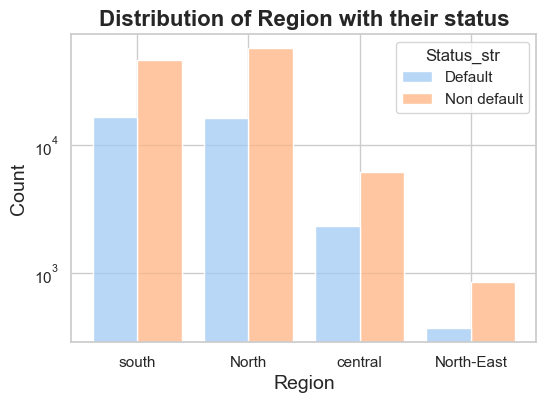

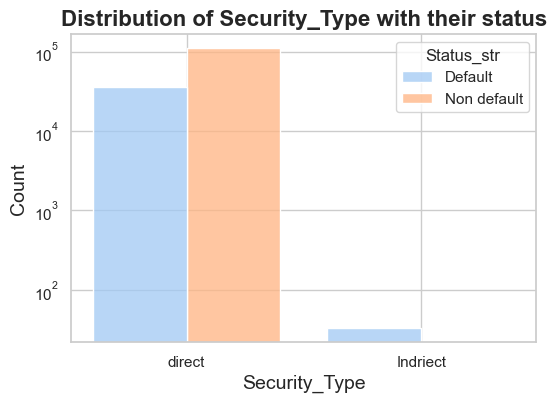

In [53]:
loans.groupby('Status_str')['property_value'].describe()
plot_boxplot_bivariate(loans, 'property_value', title="Box Plot of property_value by Status")


cross_tab = pd.crosstab(loans['occupancy_type'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='occupancy_type',  
    title='Distribution of occupancy_type with their status', 
    xlabel='occupancy_type', 
    ylabel='Count',
    log_scale = True
)


cross_tab = pd.crosstab(loans['Secured_by'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='Secured_by',  
    title='Distribution of Secured_by with their status', 
    xlabel='Secured_by', 
    ylabel='Count', log_scale = True
)




cross_tab = pd.crosstab(loans['total_units'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='total_units',  
    title='Distribution of total_units with their status', 
    xlabel='total_units', 
    ylabel='Count',
    log_scale = True
)



loans.groupby('Status_str')['income'].describe()
plot_boxplot_bivariate(loans, 'income', title="Box Plot of income by Status")


loans.groupby('Status_str')['Credit_Score'].describe()
plot_boxplot_bivariate(loans, 'Credit_Score', title="Box Plot of Credit_Score by Status")


cross_tab = pd.crosstab(loans['age'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='age',  
    title='Distribution of age with their status', 
    xlabel='age', 
    ylabel='Count'
)


loans.groupby('Status_str')['LTV'].describe()
plot_boxplot_bivariate(loans, 'LTV', title="Box Plot of LTV by Status")



cross_tab = pd.crosstab(loans['Region'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='Region',  
    title='Distribution of Region with their status', 
    xlabel='Region', 
    ylabel='Count',
    log_scale = True
)


cross_tab = pd.crosstab(loans['Security_Type'], loans['Status_str'])
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab
plot_grouped_bar_chart(
    data=loans, 
    x_column='Security_Type',  
    title='Distribution of Security_Type with their status', 
    xlabel='Security_Type', 
    ylabel='Count',
    log_scale = True
)


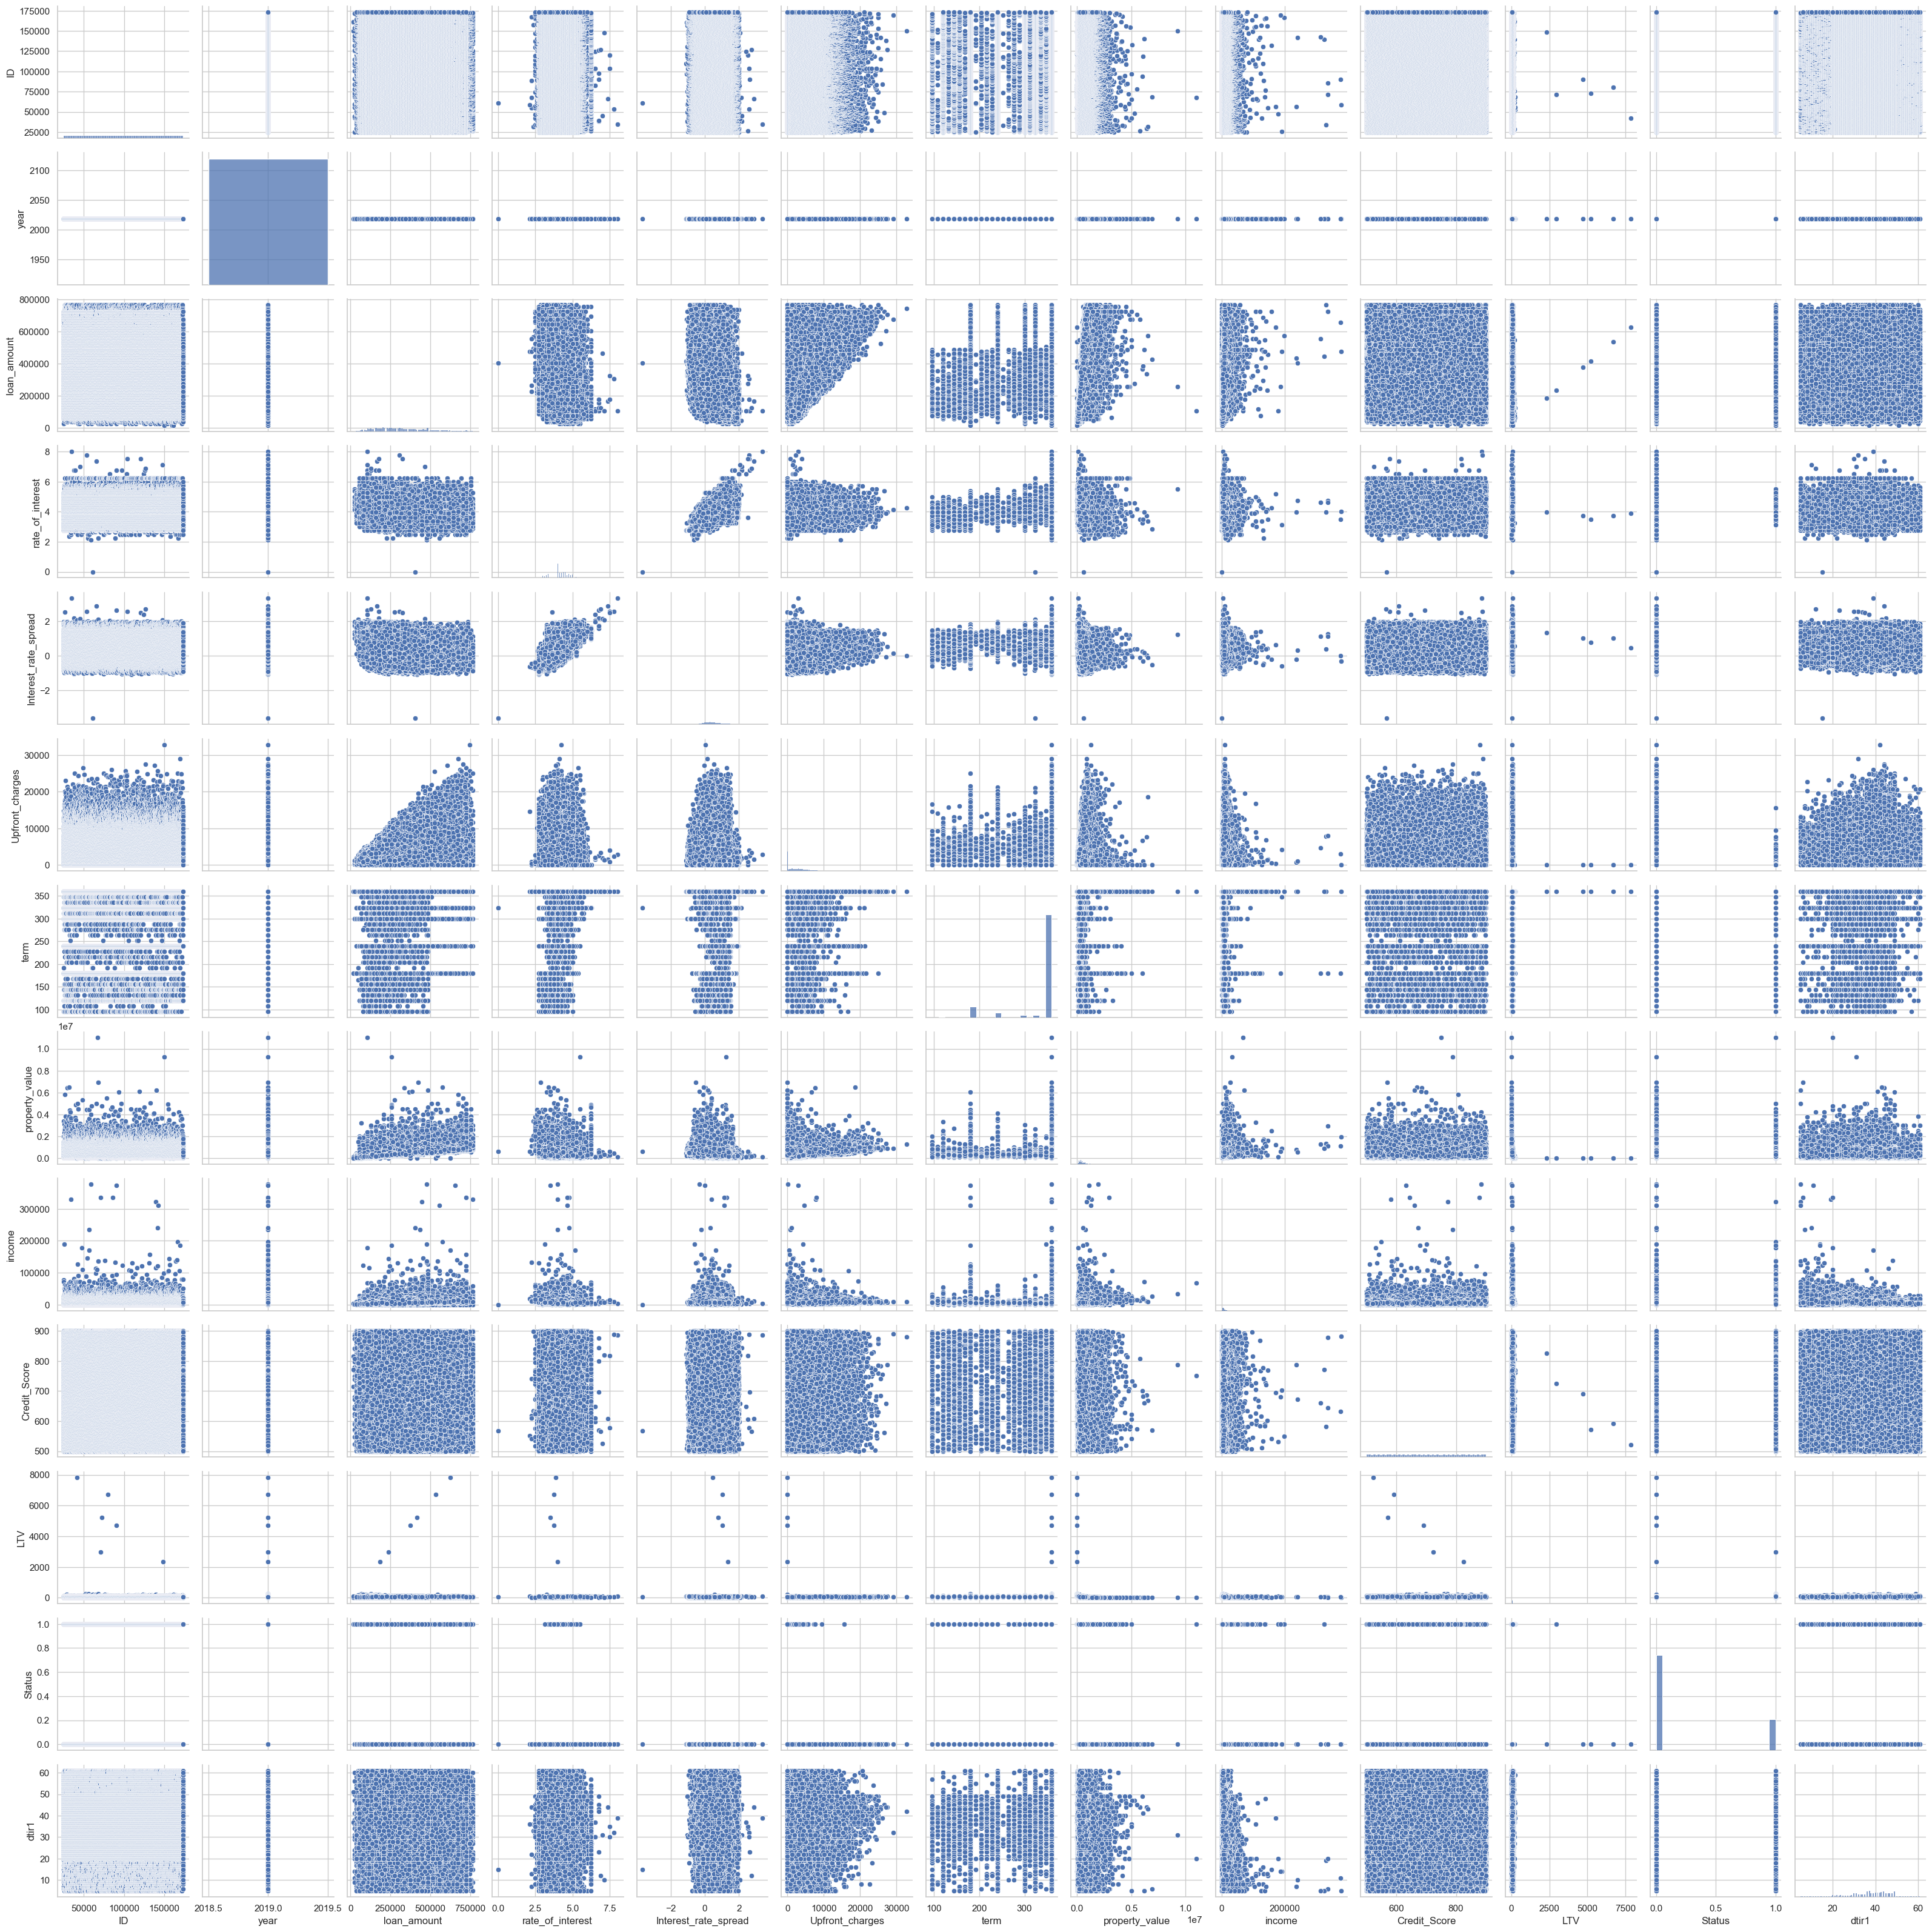

In [55]:
#MultiVariate Analysis
sns.pairplot(loans)
plt.show()

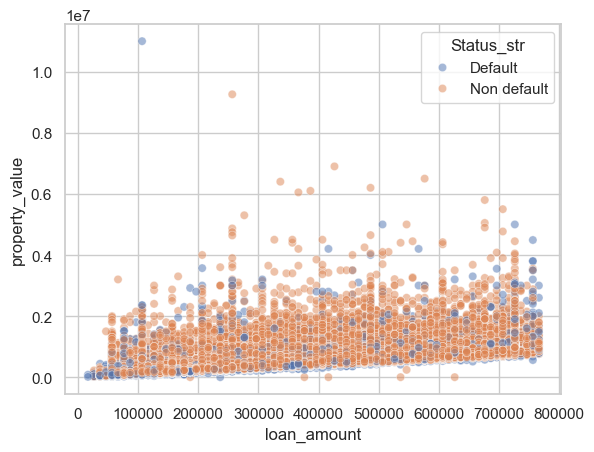

In [56]:
sns.scatterplot(data = loans , x = 'loan_amount', y = 'property_value', hue = 'Status_str', alpha = 0.5)
plt.show()